In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

house_df = pd.read_csv("../../src/kc_house_data.csv")

print(f"El archivo contiene {house_df.shape[0]} filas y {house_df.shape[1]} columnas")
print(house_df.info())
print(f"Nombre de las columnas: {house_df.columns}")

El archivo contiene 21613 filas y 21 columnas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat 

In [20]:
# Estadisticas descriptivas --------------------------------------------------------------------

house_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


A simple vista de las estadisticas no parece que los datos tengas valores atipicos, en promedio las viviendas tienen 3.37 cuartos, 2 baños y 2079 ft_2

In [21]:
house_df.iloc[:,5].dtype

dtype('int64')

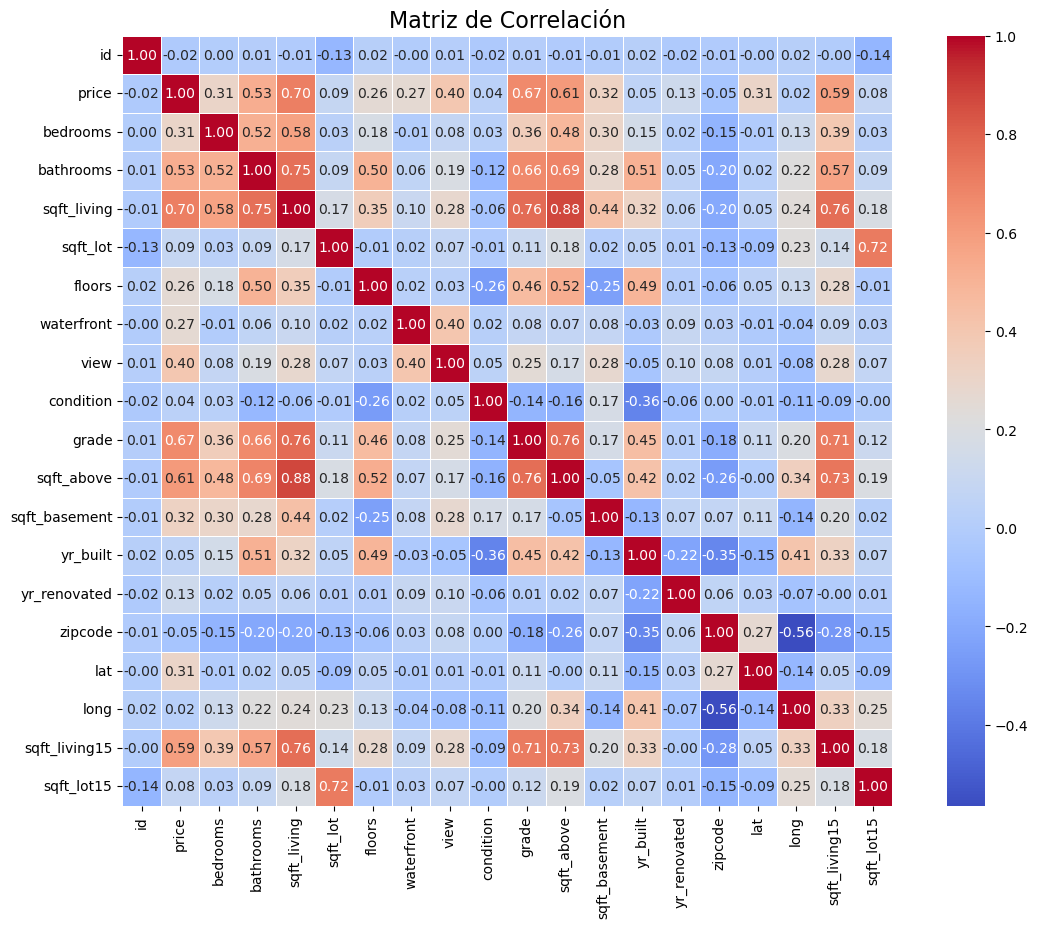

In [22]:
house_numeric = house_df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(14, 10), dpi = 100) 
sns.heatmap(
    house_numeric.corr(),
    annot=True,        
    fmt=".2f",     
    cmap="coolwarm",       
    linewidths=0.5,        
    square=True               
)
plt.title("Matriz de Correlación", fontsize=16)
plt.show()

Se pueden identificar fuertes correlaciones entre el precio, el numero de baños, habitaciones, pisos y area de la vivienda, esto es concuerda ya que si a un mayor numero de estas variables el precio tiende a aumentar. Ademas tambien se pueden encontrar correlaciones negativas como por ejemplo el año de la construcción y la condición.

C:\Users\nikol\AppData\Local\Temp\ipykernel_32516\1962608382.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bedrooms', y='price', data=house_df, palette='Set2')
C:\Users\nikol\AppData\Local\Temp\ipykernel_32516\1962608382.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bathrooms', y='price', data=house_df, palette='Set3')


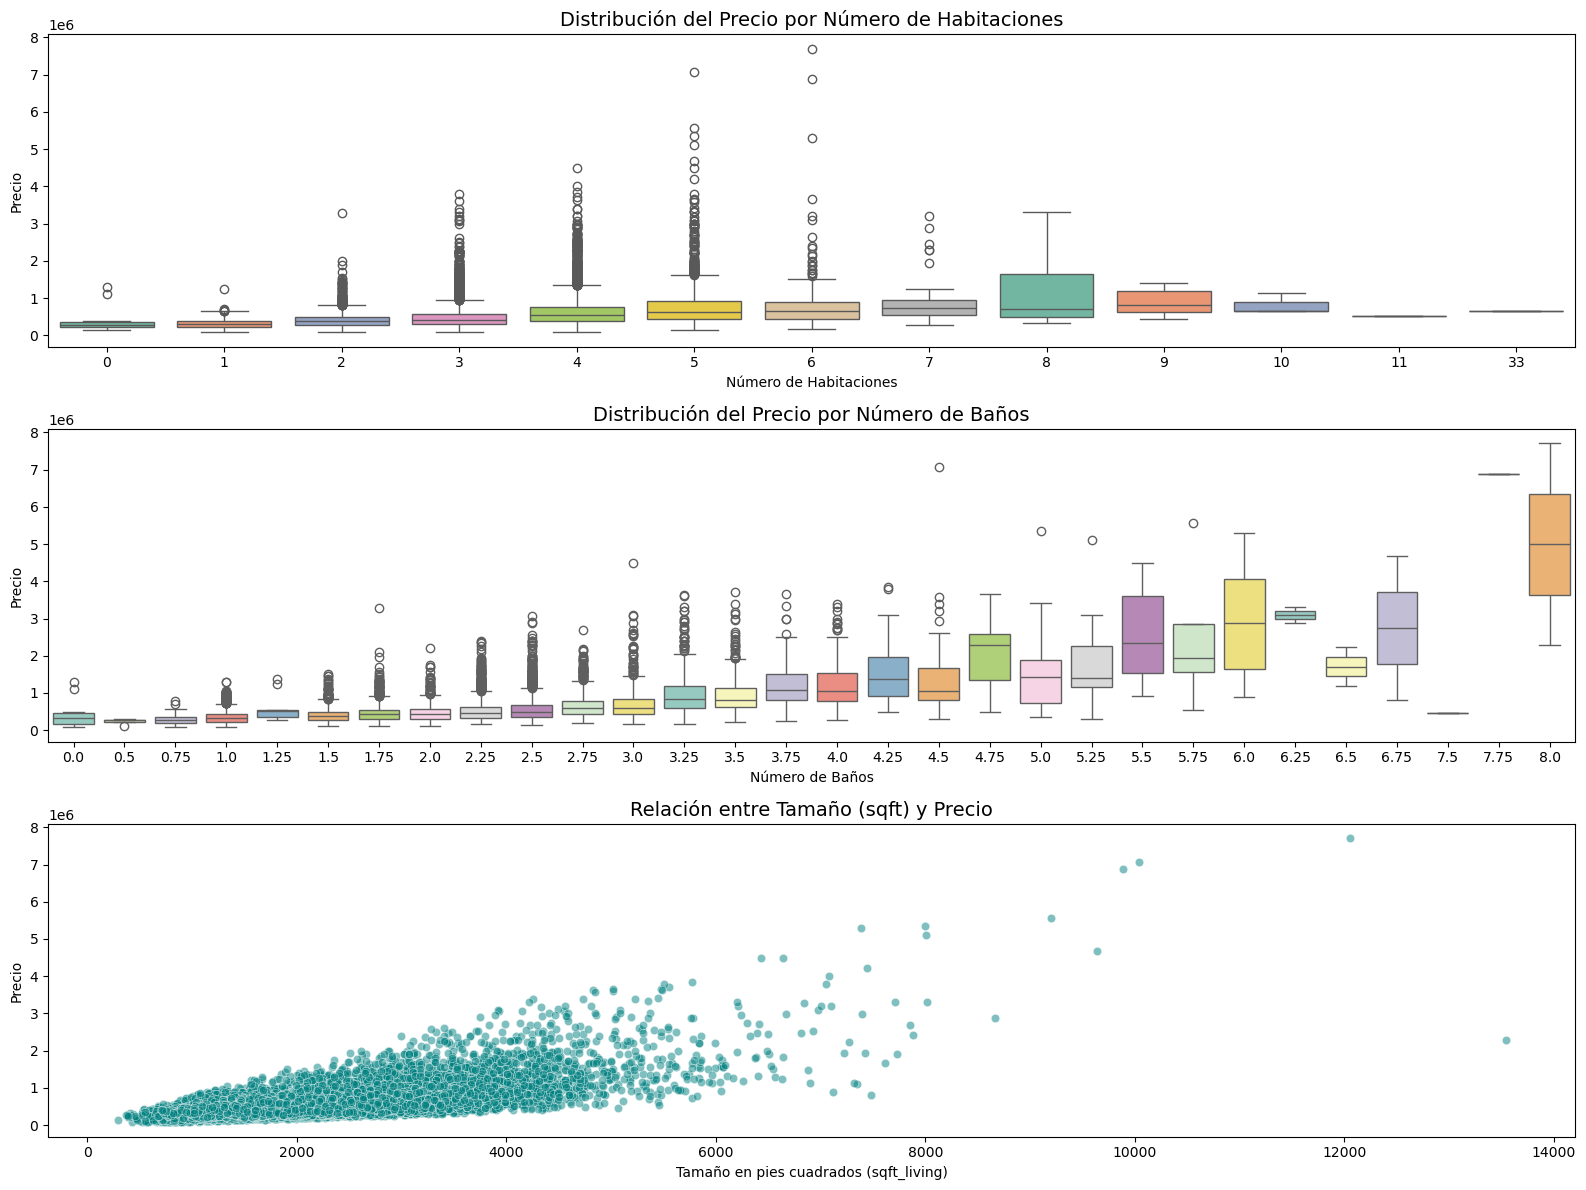

In [23]:
plt.figure(figsize=(16, 12))

# Boxplot: Price vs Bedrooms
plt.subplot(3, 1, 1)
sns.boxplot(x='bedrooms', y='price', data=house_df, palette='Set2')
plt.title('Distribución del Precio por Número de Habitaciones', fontsize=14)
plt.xlabel('Número de Habitaciones')
plt.ylabel('Precio')

# Boxplot: Price vs Bathrooms
plt.subplot(3, 1, 2)
sns.boxplot(x='bathrooms', y='price', data=house_df, palette='Set3')
plt.title('Distribución del Precio por Número de Baños', fontsize=14)
plt.xlabel('Número de Baños')
plt.ylabel('Precio')

# Scatterplot: Price vs Sqft Living
plt.subplot(3, 1, 3)
sns.scatterplot(x='sqft_living', y='price', data=house_df, alpha=0.5, color='teal')
plt.title('Relación entre Tamaño (sqft) y Precio', fontsize=14)
plt.xlabel('Tamaño en pies cuadrados (sqft_living)')
plt.ylabel('Precio')

plt.tight_layout()
plt.show()

En los tres graficos a medida que aumenta la variable aumenta el precio, sin embargo, tambien se evidencia una alta cantidad de datos atipicos que estan fuera de las medias

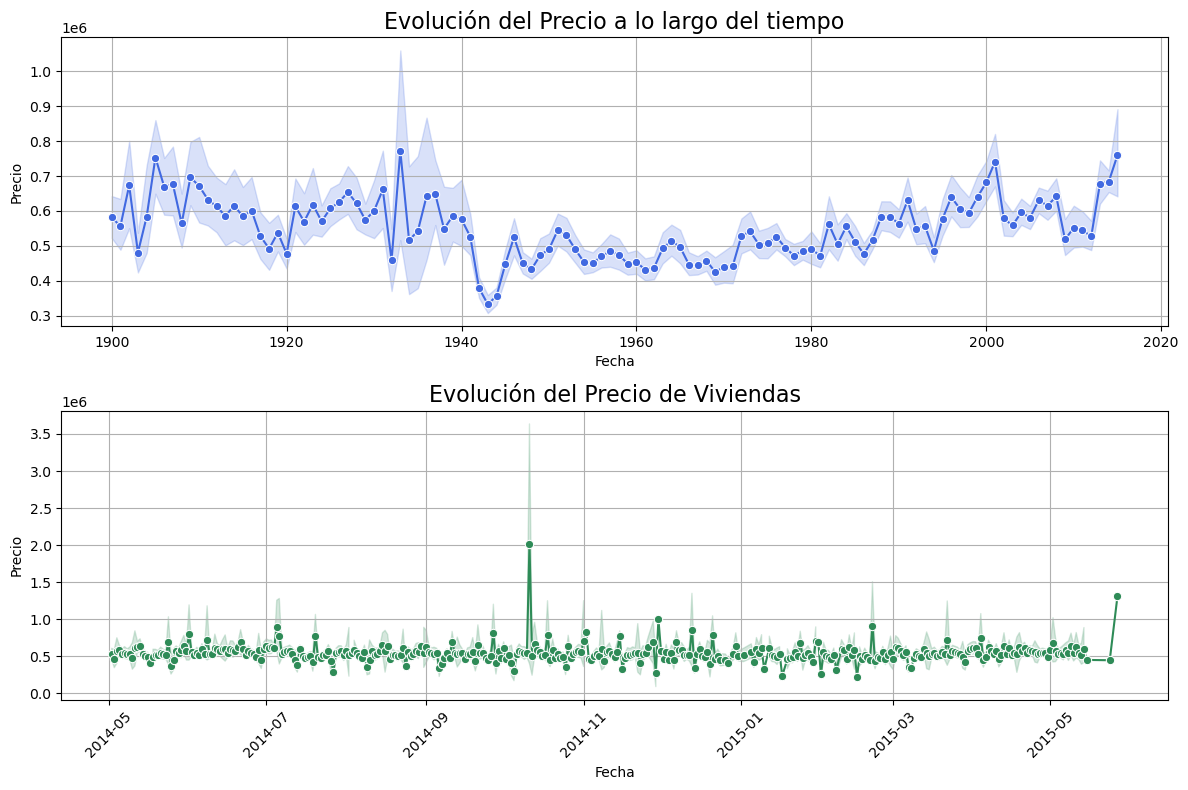

In [24]:

house_df['date'] = pd.to_datetime(house_df['date'])
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
sns.lineplot(x=house_df.yr_built, y=house_df['price'], marker='o', color='royalblue')
plt.title('Evolución del Precio a lo largo del tiempo', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.grid(True)

plt.subplot(2, 1, 2)
sns.lineplot(x=house_df.date, y=house_df['price'], marker='o', color='seagreen')
plt.title('Evolución del Precio de Viviendas', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.grid(True)
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


De acuerdo con las graficas podemos observar una tendencia alrededor de los mismos precios, esto visualizado en ambas graficas fecha de construcción y fecha de venta de la vivienda, se pueden encontrar algunos valores "atipicos" pero dentro de rangos normales. Estos se exploraran más adelante.

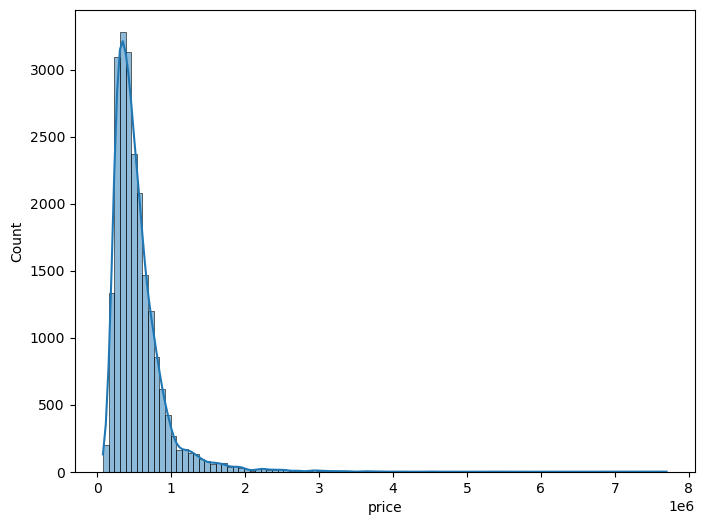

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(x=house_df['price'], bins = 100, kde=True);
plt.show()

In [26]:
Q1 = house_df['price'].quantile(0.25)
Q3 = house_df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = house_df[(house_df['price'] < lower_bound) | (house_df['price'] > upper_bound)]

print(f"Valores atípicos (IQR): {len(outliers_iqr)}")


Valores atípicos (IQR): 1146


In [27]:
outliers_iqr.describe().T

,count,mean,min,25%,50%,75%,max,std
id,1146.0,4170926364.794066,31000165.0,1700692336.0,3628845120.0,6562150052.5,9831200520.0,2832424788.248895
date,1146,2014-10-28 23:19:47.434554880,2014-05-02 00:00:00,2014-07-14 00:00:00,2014-10-15 00:00:00,2015-02-19 18:00:00,2015-05-27 00:00:00,NaN
price,1146.0,1667087.286213,1130000.0,1260125.0,1450000.0,1813750.0,7700000.0,652335.782675
bedrooms,1146.0,4.104712,0.0,4.0,4.0,5.0,10.0,0.928649
bathrooms,1146.0,3.242147,0.0,2.5,3.25,3.75,8.0,0.890846
sqft_living,1146.0,3943.38918,1560.0,3120.0,3790.0,4487.5,13540.0,1233.067707
sqft_lot,1146.0,23975.275742,609.0,7226.75,11495.5,19438.25,920423.0,59535.470266
floors,1146.0,1.820681,1.0,1.5,2.0,2.0,3.5,0.48596
waterfront,1146.0,0.089005,0.0,0.0,0.0,0.0,1.0,0.284876
view,1146.0,1.335079,0.0,0.0,0.0,3.0,4.0,1.568614


En promedio el precio de las viviendas de los datos atipicos son de 1.667.087 USD con un promedio de cuartos, baños y pies cuadrados de 4.1, 3.2 y 3943 ft2 respectivamente. Adicionalmente cuando se grafica un histograma se pueden ver que los datos estan muy concentrados a la izquierda lo cual indica la existencia de datos atipicos, lo cual es probablemente por la ubicación de estas viviendas.

In [28]:
! pip install folium

In [29]:
import folium
from folium.plugins import FastMarkerCluster

In [39]:
marker = (house_df['lat'][0], house_df['long'][0])

map = folium.Map(location=marker,   
                      zoom_start=10)

coordenadas = house_df[['lat', 'long']].values

FastMarkerCluster(name ="House Location" ,
                  data= coordenadas).add_to(map)

map